# Montecarlo

Los métodos de Montecarlo o Experimentos de Montecarlo son una amplia clase de algoritmos computacionales que se utilizan para modelar la probabilidad de diferentes resultados en un proceso que no puede ser fácilmente modelado debido a la introducción de una variable aleatoria.

- Básicamente es un algoritmo de fuerza bruta para simular procesos aleatorios 

Para demostrar un ejemplo de algoritmo vamos a ver como simular una moneda

In [1]:
import random

In [5]:
def tirar_moneda_1():
    return random.randint(0,1)

In [6]:
def tirar_moneda_2():
    return random.choice([0,1])

In [7]:
def tirar_moneda_3():
    return random.randrange(2)

- Realizando un algoritmo de monte carlo es muy importante que el tiempo de generacion de numeros aletorios sea el menor posible. Para ello hay distintas estrategias:
    - Realizar cálculos vectoriales
    - Realizar cálculos en paralelo
    - Usar funciones/código más rápido

In [8]:
%timeit tirar_moneda_1()

919 ns ± 31.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
919e-9 * 10000000

9.19

In [9]:
%timeit tirar_moneda_2()

599 ns ± 37.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
%timeit tirar_moneda_3()

604 ns ± 13.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [15]:
%timeit np.random.randint(2)

1.94 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Ahora vamos a definir el método de monte carlo, lo anterior era la simulación al lanzar una moneda

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def montecarlo(n_iters):
    resultados = 0
    probabilidad_final = []
    for i in range(n_iters):
        moneda = tirar_moneda_2()
        resultados += moneda

        probabilidad_acumulada = resultados / (i+1)
        probabilidad_final.append(probabilidad_acumulada)
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Probabilidad')
    plt.plot(probabilidad_final, color='b')
    
    return resultados / n_iters

0.482


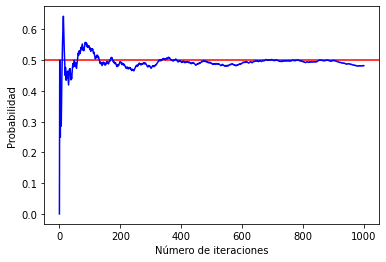

In [20]:
probabilidad_final = montecarlo(1000)
print(probabilidad_final)

0.4934

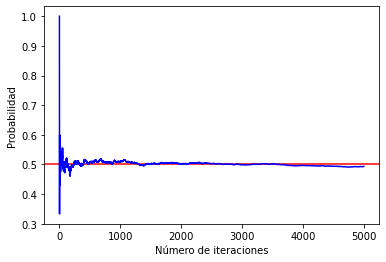

In [21]:
montecarlo(5000)

0.4974

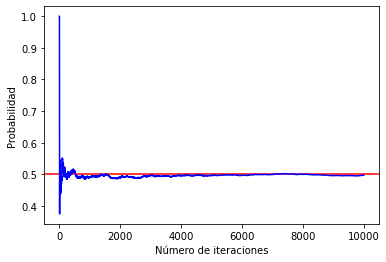

In [22]:
montecarlo(10000)

0.50064

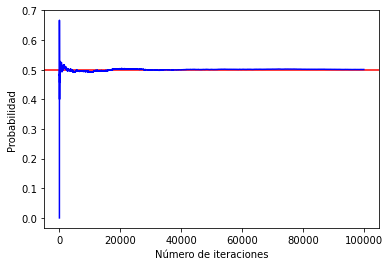

In [13]:
montecarlo(100000)

0.499704

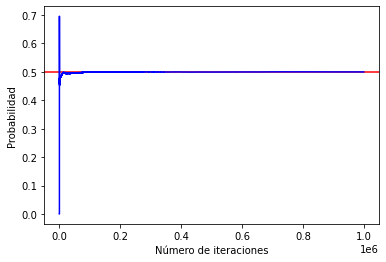

In [23]:
montecarlo(1000000)

## Ejercicio

Tira una moneda de 3 caras (cara,cruz y canto) y muestra el resultado para canto

In [64]:
%timeit np.random.randint(0,3,1000)

13.6 µs ± 233 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [65]:
%timeit [ tirar_moneda_1() for i in range(1000) ]

868 µs ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
tiradas = np.random.randint(0,3,100)
np.unique(tiradas, return_counts=True)

(array([0, 1, 2]), array([34, 33, 33], dtype=int64))

In [52]:
def moneda_tres_caras(n_iters):
    tiradas = np.random.randint(0,3,n_iters)
    probs = np.unique(tiradas, return_counts=True)[1] / n_iters
    return probs


In [53]:
moneda_tres_caras(n_iters=1000000)

array([0.333875, 0.333045, 0.33308 ])

In [66]:
def moneda_tres_caras(n_iters):
    tiradas = np.random.choice([0,1,2],n_iters, replace=True, p=[0.499,0.499,0.002])
    probs = np.unique(tiradas, return_counts=True)[1] / n_iters
    return probs

In [67]:
moneda_tres_caras(n_iters=1000000)

array([0.49979 , 0.498177, 0.002033])